In [1]:
from astropy.io import fits
import numpy as np
import torch
from matplotlib import pyplot as plt
import os

In [2]:
datadir = "/net/virgo01/data/users/mahesh/DeepLearning/data/"
labeldir = "/net/virgo01/data/users/spirov/Deep/catalog_tng100_jwst_all_50sns.fits"

labels = fits.open(labeldir)[1]


label = labels.data[np.random.randint(len(labels.data))]
ID = label["ID"]
snap =label["snapnum"]

img = fits.open(datadir+f"mock_v4/F150W/L75n1820TNG/snapnum_0{snap}/xy/JWST_50kpc_F150W_TNG100_sn0{snap}_xy_broadband_{ID}.fits")[0]



Text(0.5, 1.0, '212115')

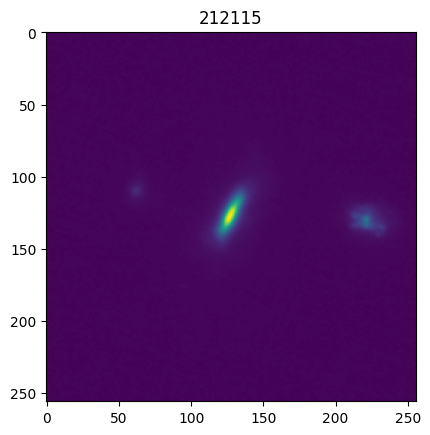

In [3]:
plt.imshow(img.data[0])
plt.title(ID)

In [4]:
print("Time before = "+str(label["time_before_merger"]))
print("Time after = "+str(label["time_after_merger"]))
print(f"Is Pre = {label['is_pre_merger']}")
print(f"Is Ongoing = {label['is_ongoing_merger']}")
print(f"Is Pre = {label['is_post_merger']}")


Time before = 1.5879999999999992
Time after = 4.007
Is Pre = 0
Is Ongoing = 0
Is Pre = 0


In [5]:
labels.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                   88 / width of table in bytes                        
NAXIS2  =                58436 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                   11 / number of columns                              
EXTNAME = '/Users/antoniolm/Documents/PhD/Students/catalog_tng100_jwst_all_full'
TTYPE1  = 'ID      '           / label for column 1                             
TFORM1  = 'K       '           / format for column 1                            
TTYPE2  = 'redshift'           / label for column 2                             
TFORM2  = 'D       '        

In [6]:
from torch.utils.data import Dataset


class RegressionDataset(Dataset):
    def __init__(self, datadir,labels,transform):
        self.lengt = len(labels.data)
        self.labels = labels
        
        self.transform = transform
        
        self.dataDir = datadir

    def __len__(self):
        return self.lengt

    def __getitem__(self, idx):
    
        label = self.labels.data[idx]
        
        tim = label['time_before_merger']
        ID = label["ID"]
        snap =label["snapnum"]

        img = fits.open(self.dataDir+f"mock_v4/F150W/L75n1820TNG/snapnum_0{snap}/xy/JWST_50kpc_F150W_TNG100_sn0{snap}_xy_broadband_{ID}.fits")[0].data
        img = img.astype(np.float32, copy=False)
        img = img.newbyteorder("=")  
        
        given = torch.tensor(self.transform(img))
        out = torch.tensor(tim)

        return given,out

    
class ClassificationDataset(Dataset):
    def __init__(self, datadir,labels,transform):
        self.lengt = len(labels.data)
        self.labels = labels
        
        self.transform = transform
        
        self.dataDir = datadir

    def __len__(self):
        return self.lengt

    def __getitem__(self, idx):
    
        label = self.labels.data[idx]
        
        tim = label['time_before_merger']
        ID = label["ID"]
        snap =label["snapnum"]
        
        isMerging = tim>0

        img = fits.open(self.dataDir+f"mock_v4/F150W/L75n1820TNG/snapnum_0{snap}/xy/JWST_50kpc_F150W_TNG100_sn0{snap}_xy_broadband_{ID}.fits")[0].data
        img = img.astype(np.float32, copy=False)
        img = img.newbyteorder("=")  
        
        given = torch.tensor(self.transform(img))
        out = torch.tensor(isMerging)

        return given,out

In [7]:
def unityTransform(inp):
    return inp

In [8]:
datset = ClassificationDataset(datadir,labels,unityTransform)

tensor(True)


/tmp/ipykernel_697266/348078223.py:61: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  out = torch.tensor(isMerging)


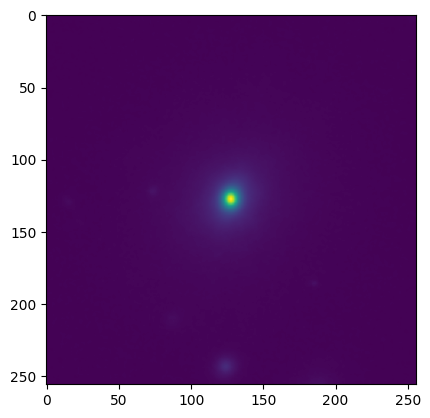

In [9]:
for inp, out in datset:
    plt.imshow(inp[0])
    print(out)
    
    break